In [1]:
!pip uninstall keras-nightly
!pip uninstall -y tensorflow
!pip install h5py==2.10.0
!pip install tensorflow==1.15.0
!pip install tensorflow-gpu==1.15.0
!pip install keras==2.1.6

  Running setup.py clean for h5py
Failed to build h5py
  Attempting uninstall: h5py
    Found existing installation: h5py 3.6.0
    Uninstalling h5py-3.6.0:
      Successfully uninstalled h5py-3.6.0
    Running setup.py install for h5py: started
    Running setup.py install for h5py: finished with status 'error'
  Rolling back uninstall of h5py
  Moving to c:\users\andrea\anaconda3\lib\site-packages\h5py-3.6.0.dist-info\
   from C:\Users\Andrea\anaconda3\Lib\site-packages\~5py-3.6.0.dist-info
  Moving to c:\users\andrea\anaconda3\lib\site-packages\h5py\
   from C:\Users\Andrea\anaconda3\Lib\site-packages\~5py


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Andrea\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Andrea\\AppData\\Local\\Temp\\pip-install-y4q5jcik\\h5py_fe4d0b2f3bfa4fb595d5e6220d17f645\\setup.py'"'"'; __file__='"'"'C:\\Users\\Andrea\\AppData\\Local\\Temp\\pip-install-y4q5jcik\\h5py_fe4d0b2f3bfa4fb595d5e6220d17f645\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Andrea\AppData\Local\Temp\pip-wheel-6xp9vi3u'
       cwd: C:\Users\Andrea\AppData\Local\Temp\pip-install-y4q5jcik\h5py_fe4d0b2f3bfa4fb595d5e6220d17f645\
  Complete output (1328 lines):
  C:\Users\Andrea\anaconda3\lib\site-packages\setuptools\installer.py:27: SetuptoolsDeprecationWarning: setuptools.i

  Loading library to get version: hdf5.dll
  Autodetected HDF5 1.10.6
  ********************************************************************************
                         Summary of the h5py configuration
  
      Path to HDF5: None
      HDF5 Version: '1.10.6'
       MPI Enabled: False
  Rebuild Required: True
  
  ********************************************************************************
  Executing api_gen rebuild of defs
  Executing cythonize()
  [ 1/23] Cythonizing C:\Users\Andrea\AppData\Local\Temp\pip-install-y4q5jcik\h5py_fe4d0b2f3bfa4fb595d5e6220d17f645\h5py\_conv.pyx
  [ 2/23] Cythonizing C:\Users\Andrea\AppData\Local\Temp\pip-install-y4q5jcik\h5py_fe4d0b2f3bfa4fb595d5e6220d17f645\h5py\_errors.pyx
  [ 3/23] Cythonizing C:\Users\Andrea\AppData\Local\Temp\pip-install-y4q5jcik\h5py_fe4d0b2f3bfa4fb595d5e6220d17f645\h5py\_objects.pyx
  [ 4/23] Cythonizing C:\Users\Andrea\AppData\Local\Temp\pip-install-y4q5jcik\h5py_fe4d0b2f3bfa4fb595d5e6220d17f645\h5py\_proxy.pyx
  [ 

    Loading library to get version: hdf5.dll
    Autodetected HDF5 1.10.6
    ********************************************************************************
                           Summary of the h5py configuration
    
        Path to HDF5: None
        HDF5 Version: '1.10.6'
         MPI Enabled: False
    Rebuild Required: True
    
    ********************************************************************************
    Executing cythonize()
    [ 1/23] Cythonizing C:\Users\Andrea\AppData\Local\Temp\pip-install-y4q5jcik\h5py_fe4d0b2f3bfa4fb595d5e6220d17f645\h5py\_conv.pyx
    [ 2/23] Cythonizing C:\Users\Andrea\AppData\Local\Temp\pip-install-y4q5jcik\h5py_fe4d0b2f3bfa4fb595d5e6220d17f645\h5py\_errors.pyx
    [ 3/23] Cythonizing C:\Users\Andrea\AppData\Local\Temp\pip-install-y4q5jcik\h5py_fe4d0b2f3bfa4fb595d5e6220d17f645\h5py\_objects.pyx
    [ 4/23] Cythonizing C:\Users\Andrea\AppData\Local\Temp\pip-install-y4q5jcik\h5py_fe4d0b2f3bfa4fb595d5e6220d17f645\h5py\_proxy.pyx
    [ 5/

ERROR: Could not find a version that satisfies the requirement tensorflow==1.15.0 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.10.0rc0)
ERROR: No matching distribution found for tensorflow==1.15.0
ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==1.15.0 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.10.0rc0)
ERROR: No matching distribution found for tensorflow-gpu==1.15.0


In [ ]:
from keras.layers import SimpleRNN, Embedding, Dense
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

Using TensorFlow backend.


In [ ]:
df = pd.read_csv("spam.csv",encoding = "ISO-8859-1")

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
pd.unique(df.v1)

array(['ham', 'spam'], dtype=object)

In [ ]:
d1 = {'spam': 1 , 'ham': 0}
df['v1'] = df['v1'].map(d1)

In [ ]:
labels=np.asarray(df.v1)
texts=np.asarray(df.v2).astype('<U910')
print("number of texts :" , len(texts))
print("number of labels: ", len(labels))

number of texts : 5572
number of labels:  5572


In [ ]:
maxlen = 500
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
df = pad_sequences(sequences, maxlen=maxlen)
np.random.seed(42)

indices = np.arange(df.shape[0])
np.random.shuffle(indices)
df = df[indices]
clases = labels[indices]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, clases, test_size=0.2, shuffle=True)

In [ ]:
max_features = 10000
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
history_rnn = model.fit(X_train, y_train, epochs=10, batch_size=60, validation_split=0.2)




Train on 3565 samples, validate on 892 samples
Epoch 1/10





3565/3565 [==============================] - 9s 2ms/step - loss: 0.3816 - acc: 0.8805 - val_loss: 0.1869 - val_acc: 0.9630
Epoch 2/10
3565/3565 [==============================] - 11s 3ms/step - loss: 0.1096 - acc: 0.9750 - val_loss: 0.1086 - val_acc: 0.9709
Epoch 3/10
3565/3565 [==============================] - 11s 3ms/step - loss: 0.0515 - acc: 0.9893 - val_loss: 0.0745 - val_acc: 0.9821
Epoch 4/10
3565/3565 [==============================] - 7s 2ms/step - loss: 0.0295 - acc: 0.9947 - val_loss: 0.0706 - val_acc: 0.9821
Epoch 5/10
3565/3565 [==============================] - 5s 1ms/step - loss: 0.0175 - acc: 0.9975 - val_loss: 0.0677 - val_acc: 0.9821
Epoch 6/10
3565/3565 [==============================] - 5s 1ms/step - loss: 0.0115 - acc: 0.9983 - val_loss: 0.0691 - val_acc: 0.9832
Epoch 7/10
3565/3565 [==============================] - 5s 1ms/step - loss: 0.0087 - acc: 0.9989 - val_loss: 0.0717 - val_acc: 0.9832
Epoch

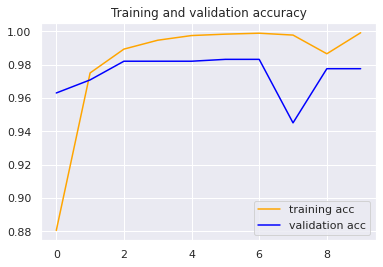

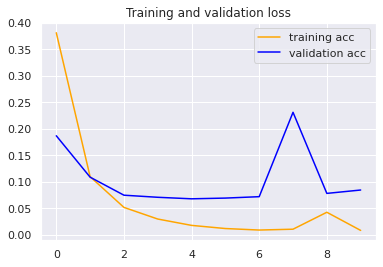

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history_rnn.history['acc']
val_acc = history_rnn.history['val_acc']
loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
pred = model.predict_classes(X_test)
acc = model.evaluate(X_test, y_test)
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))
cm = confusion_matrix(pred, y_test)

1115/1115 [==============================] - 1s 614us/step
Test loss is 0.04 accuracy is 0.99  


In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


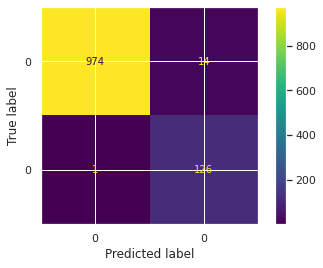

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()
